# Task 2
## Prediction using Unsupervised ML
## Optimal clusters for a Kmeans clustering technique
### Author: Chennoju Bhuvan Kumar

<img src = "iris-dataset.png">

In this notobook, a methods to find optimum number of clusters are implemented with kmeans clustering on Iris dataset. Iris dataset is collection of three different sprices of iris flower with different petals and sepal length and widths. With an optimal clustering, we can group them into clusters using an unsupervised machine learning techinques. Number of clusters choosing is very important to get group them together. In practice to find optimal number of cluster, most of the ML practisioners uses elbow method, Which is implemented in this notebook. 

## Importing libraries

In [15]:
import pandas as pd
import numpy as np

from sklearn import datasets
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('dark_background')
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## loading dataset and visulazation

In [16]:
df = pd.read_csv('Iris.csv')
df = df.reset_index(drop = True)
df.drop(['Id'], axis =1, inplace = True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset is clean with no null values and all set to go ahead.  

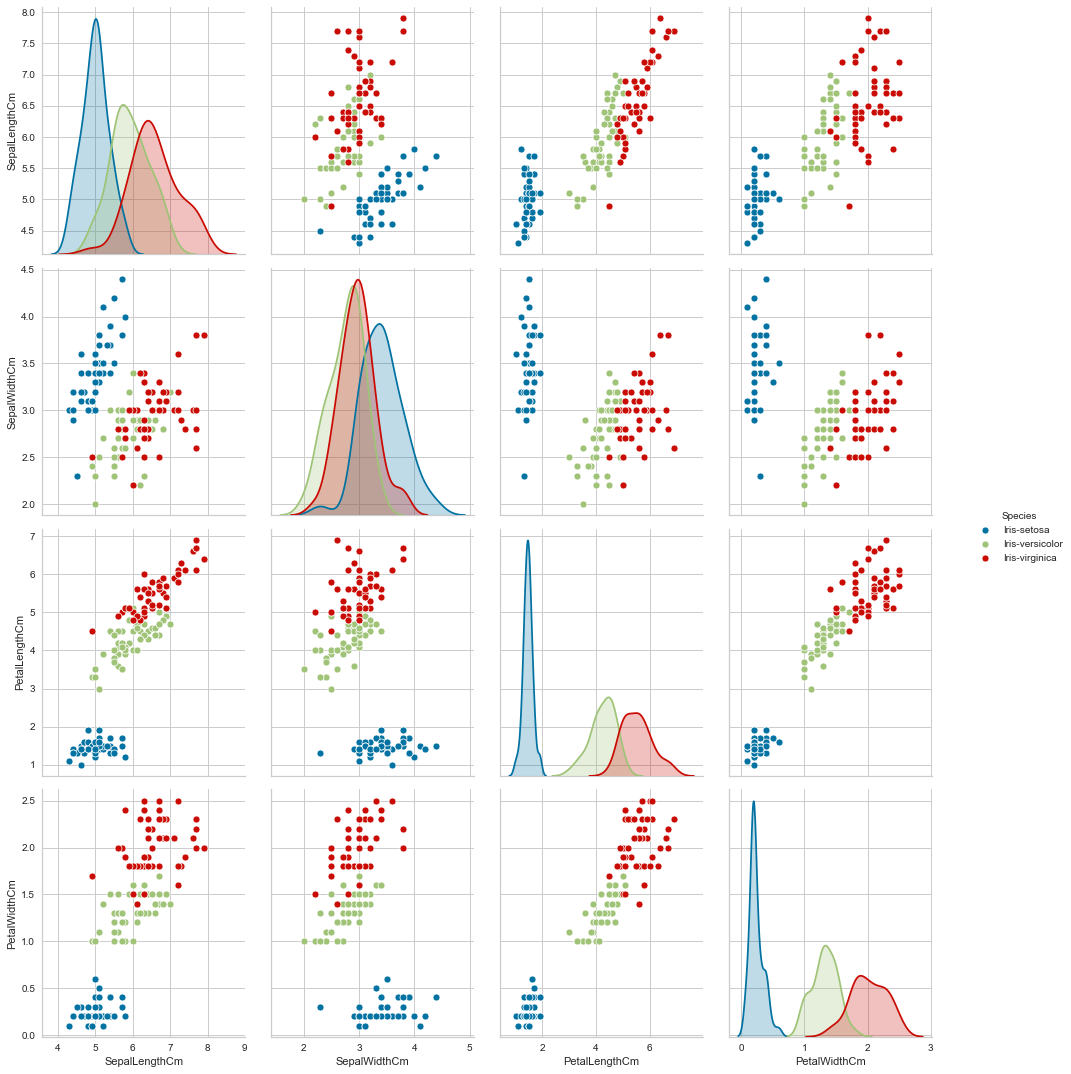

In [20]:

g = sns.pairplot(df, hue = 'Species', kind = 'scatter')
g.fig.set_size_inches(15,15)

### Understanding data with distribution plots

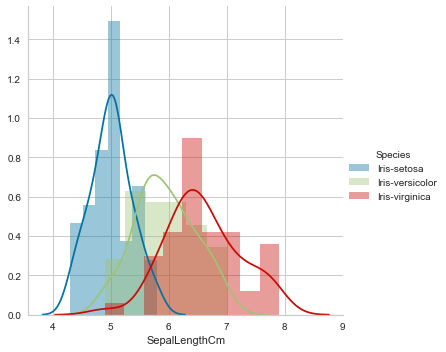

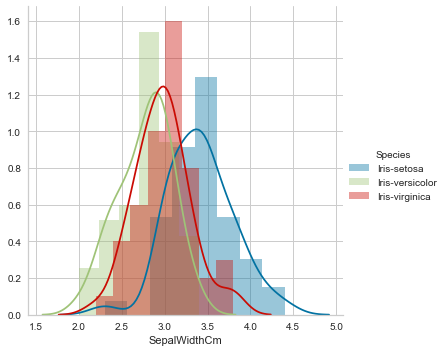

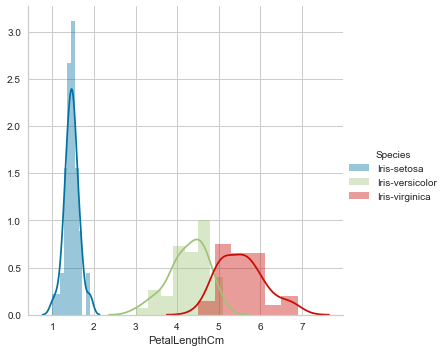

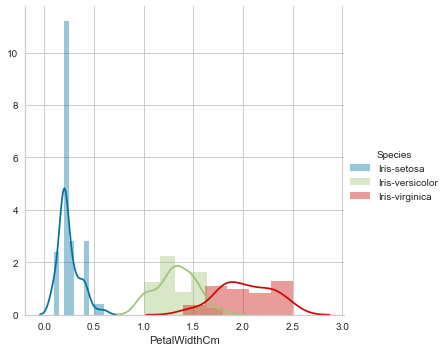

In [21]:

(sns.FacetGrid(df, hue = 'Species', size = 5)
    .map(sns.distplot, 'SepalLengthCm')
    .add_legend())


(sns.FacetGrid(df, hue = 'Species', size = 5)
    .map(sns.distplot, 'SepalWidthCm')
    .add_legend())

(sns.FacetGrid(df, hue = 'Species', size = 5)
    .map(sns.distplot, 'PetalLengthCm')
    .add_legend())

(sns.FacetGrid(df, hue = 'Species', size = 5)
    .map(sns.distplot, 'PetalWidthCm')
    .add_legend())


plt.show()

In [22]:
import plotly.express as px

fig = px.scatter(df, x = 'SepalLengthCm', y = 'PetalLengthCm', color = 'Species', facet_col = 'Species', size = 'PetalWidthCm')
fig.show()

## Methods to find optimal number of clusters 

### 1. Elbow method

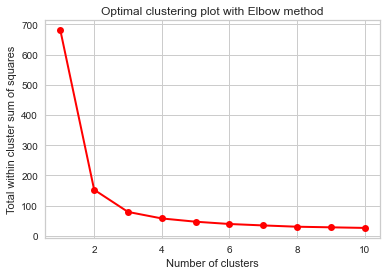

In [23]:
# Finding the optimum number of clusters for k-means classification
data = df.iloc[:, 0:-1]
labels = df.iloc[:, -1]
x = data.values


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,'o-',linewidth = 2, color = 'red' )
plt.title('Optimal clustering plot with Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Total within cluster sum of squares')
plt.show()

 From the above plot, when number of cluster increased from 1 to 2 there is sudden decline in the wcss and for three cluster this value is almost reached plateau. So, we can safely assume that number of cluster to be 3.

### 2. Silhouette Method

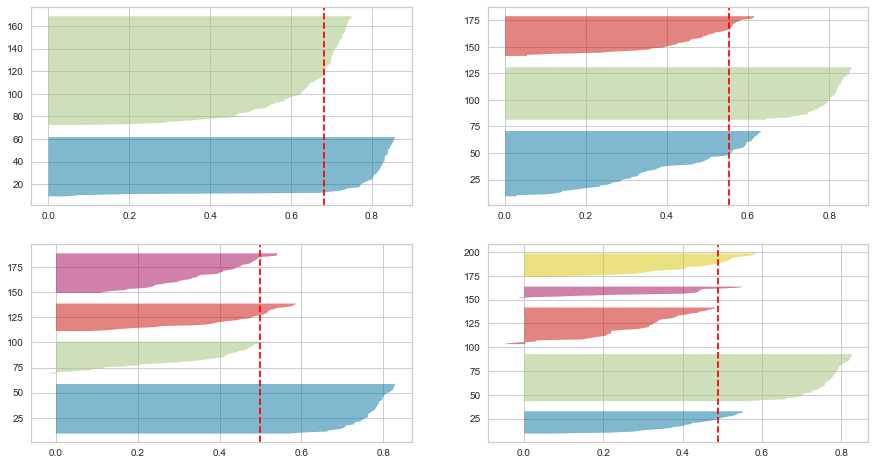

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

From the plots of silhouette score, for cluster 2 and 3, the red line is near to value one, which is average silhoutette score. To choose an optimal number of clusters we need this average to be close to one and all  the individual custer scores need to be near value one with no negative scores. In this situation, we can safely assume that number of clusters to be 3. 

## Final Optimal Cluster visulaization

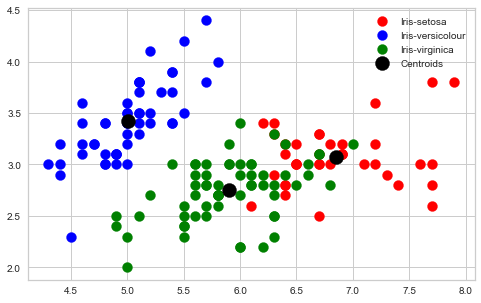

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_preds = kmeans.fit_predict(x)

plt.figure(figsize = (8,5))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_preds == 0, 0], x[y_preds == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_preds == 1, 0], x[y_preds == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_preds == 2, 0], x[y_preds == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'black', label = 'Centroids')

plt.legend()
plt.show()


## Decision Boundaraies for Optimal cluster

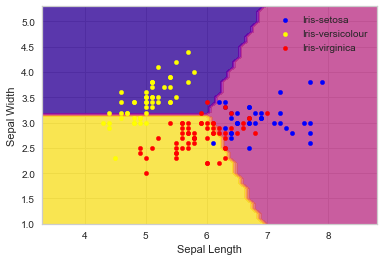

In [26]:


# Loading some example data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Training classifiers
clf = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 400, n_init = 10, random_state = 0)
#y_preds = kmeans.fit_predict(x)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.fit_predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8,  cmap = 'plasma')
#plt.scatter(X[:, 0], X[:, 1], c = y, cmap  =  'viridis', s=50)


plt.scatter(x[y_preds == 0, 0], x[y_preds == 0, 1], 
            s = 20, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_preds == 1, 0], x[y_preds == 1, 1], 
            s = 20, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_preds == 2, 0], x[y_preds == 2, 1],
            s = 20, c = 'red', label = 'Iris-virginica')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# End  of the Task 2


In [14]:
!jt -r

Reset css and font defaults in:
C:\Users\Lenovo\.jupyter\custom &
C:\Users\Lenovo\AppData\Roaming\jupyter\nbextensions
